In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from scipy.optimize import fmin_tnc
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
from gmdhpy import gmdh
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.isnull().sum()

In [5]:
df.shape

(129880, 24)

In [6]:
data = df.dropna(axis=1, how='any')

In [7]:
data.isnull().sum()

In [8]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for column in ["Gender","Customer Type", "Type of Travel", "Class", "Satisfaction"]:
    data[column] = LE.fit_transform(data[column])

<ipython-input-8-ed2ecd59760f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = LE.fit_transform(data[column])


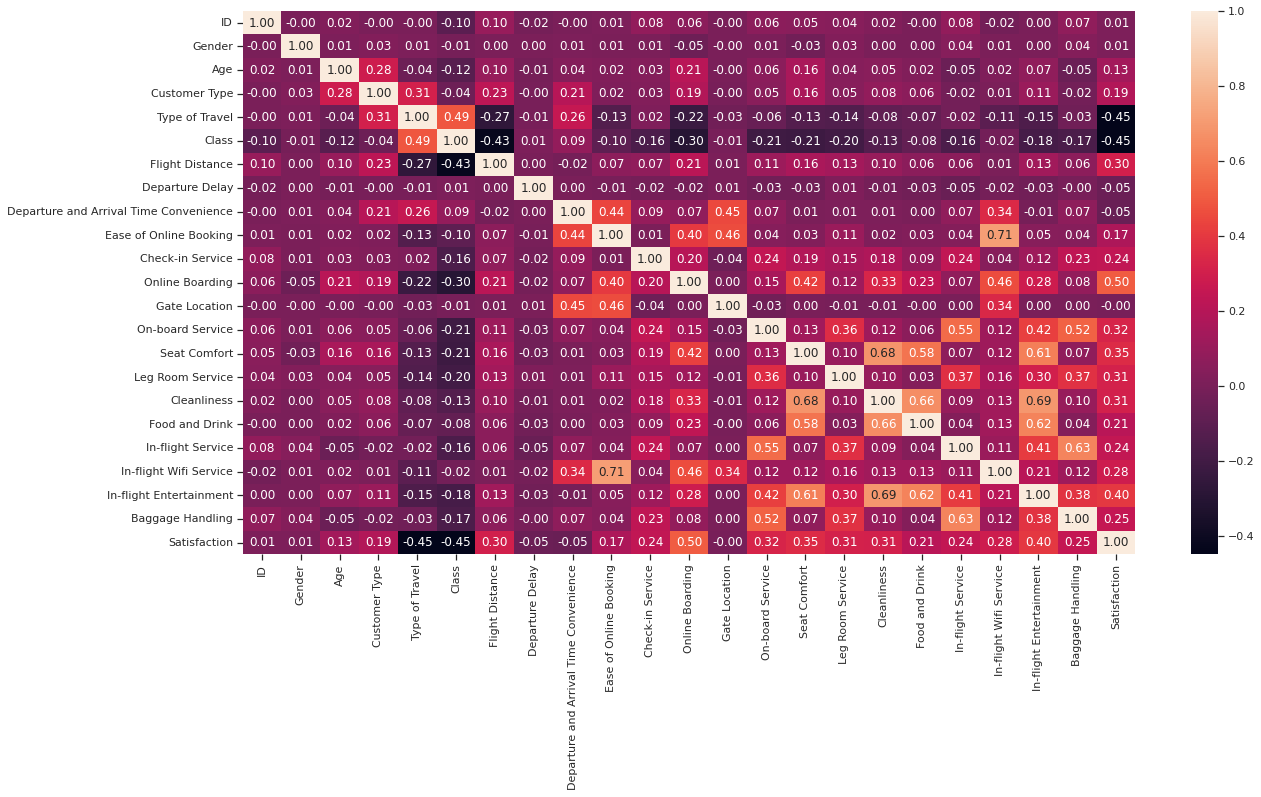

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
#Удаление ненужных столбцов
data = data.drop(columns=["Type of Travel", "Class", "Departure Delay", "Departure and Arrival Time Convenience", "Online Boarding", "Gate Location"], axis=1)

In [11]:
data.head()

,ID,Gender,Age,Customer Type,Flight Distance,Ease of Online Booking,Check-in Service,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,821,3,4,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,821,2,3,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,853,4,4,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,1905,2,3,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,3470,3,3,3,4,4,5,4,3,3,3,3,1


## Случайный лес

In [12]:
xArray = data.drop("Satisfaction", axis=1)
yArray = data["Satisfaction"]

In [13]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

In [14]:
model1=RandomForestClassifier(n_estimators=600, max_features='sqrt',min_samples_leaf=1, oob_score=True)
model1.fit(trainX, trainY)

RandomForestClassifier(n_estimators=600, oob_score=True) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestClassifier RandomForestClassifier(n_estimators=600, oob_score=True)

In [15]:
print (model1.score(trainX, trainY))

1.0


In [16]:
preds = model1.predict(testX)
preds

In [17]:
print("Accuracy:  ",accuracy_score(testY, preds))
print("Precision: ",precision_score(testY, preds))
print("Recall:    ",recall_score(testY, preds))

Accuracy:   0.932245149368648
Precision:  0.9387209730925176
Recall:     0.9029427406488212


## Градиентный бустинг

Библиотека CatBoost

In [18]:
model2 = CatBoostClassifier(iterations=200,
                           learning_rate=1,
                           min_data_in_leaf=1)

In [19]:
model2.fit(trainX, trainY)

0:	learn: 0.3619330	total: 84.7ms	remaining: 16.9s
1:	learn: 0.2996562	total: 119ms	remaining: 11.8s
2:	learn: 0.2735736	total: 135ms	remaining: 8.83s
3:	learn: 0.2580508	total: 149ms	remaining: 7.31s
4:	learn: 0.2504989	total: 164ms	remaining: 6.4s
5:	learn: 0.2404930	total: 178ms	remaining: 5.74s
6:	learn: 0.2334368	total: 192ms	remaining: 5.29s
7:	learn: 0.2270575	total: 206ms	remaining: 4.94s
8:	learn: 0.2218360	total: 220ms	remaining: 4.67s
9:	learn: 0.2162367	total: 235ms	remaining: 4.46s
10:	learn: 0.2127840	total: 249ms	remaining: 4.28s
11:	learn: 0.2094695	total: 264ms	remaining: 4.13s
12:	learn: 0.2022510	total: 280ms	remaining: 4.02s
13:	learn: 0.1996804	total: 295ms	remaining: 3.92s
14:	learn: 0.1963966	total: 310ms	remaining: 3.82s
15:	learn: 0.1943001	total: 325ms	remaining: 3.74s
16:	learn: 0.1899629	total: 340ms	remaining: 3.66s
17:	learn: 0.1879326	total: 354ms	remaining: 3.58s
18:	learn: 0.1866430	total: 369ms	remaining: 3.52s
19:	learn: 0.1854326	total: 384ms	remaini

In [20]:
print (model2.score(trainX, trainY))

0.9570853865106252


In [21]:
preds_2 = model2.predict(testX)
preds_2

In [22]:
print("Accuracy:  ",accuracy_score(testY, preds_2))
print("Precision: ",precision_score(testY, preds_2))
print("Recall:    ",recall_score(testY, preds_2))

Accuracy:   0.9263550970126271
Precision:  0.9204739251413697
Recall:     0.9089700407729127


## Стекинг

Библиотека mlxtend

In [25]:
model3 = DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random')

In [26]:
model4 = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=1)

In [27]:
models_to_train = [model1, model2, model3]

In [28]:
stack = StackingClassifier(classifiers=models_to_train,
                            meta_classifier=model4)

In [29]:
stack.fit(trainX, trainY)

0:	learn: 0.3619330	total: 16.4ms	remaining: 3.26s
1:	learn: 0.2996562	total: 31.7ms	remaining: 3.13s
2:	learn: 0.2735736	total: 46ms	remaining: 3.02s
3:	learn: 0.2580508	total: 59.9ms	remaining: 2.93s
4:	learn: 0.2504989	total: 74ms	remaining: 2.89s
5:	learn: 0.2404930	total: 87.5ms	remaining: 2.83s
6:	learn: 0.2334368	total: 102ms	remaining: 2.81s
7:	learn: 0.2270575	total: 115ms	remaining: 2.77s
8:	learn: 0.2218360	total: 129ms	remaining: 2.75s
9:	learn: 0.2162367	total: 144ms	remaining: 2.74s
10:	learn: 0.2127840	total: 159ms	remaining: 2.72s
11:	learn: 0.2094695	total: 173ms	remaining: 2.7s
12:	learn: 0.2022510	total: 187ms	remaining: 2.69s
13:	learn: 0.1996804	total: 203ms	remaining: 2.69s
14:	learn: 0.1963966	total: 218ms	remaining: 2.69s
15:	learn: 0.1943001	total: 233ms	remaining: 2.68s
16:	learn: 0.1899629	total: 248ms	remaining: 2.67s
17:	learn: 0.1879326	total: 262ms	remaining: 2.65s
18:	learn: 0.1866430	total: 276ms	remaining: 2.63s
19:	learn: 0.1854326	total: 293ms	remain

StackingClassifier(classifiers=[RandomForestClassifier(n_estimators=600,
 oob_score=True),
 <catboost.core.CatBoostClassifier object at 0x7f2cac1e8520>,
 DecisionTreeClassifier(max_depth=5,
 random_state=1,
 splitter='random')],
 meta_classifier=LogisticRegression(C=0.01, penalty='l1',
 random_state=1,
 solver='liblinear')) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. StackingClassifier StackingClassifier(classifiers=[RandomForestClassifier(n_estimators=600,
 oob_score=True),
 <catboost.core.CatBoostClassifier object at 0x7f2cac1e8520>,
 DecisionTreeClassifier(max_depth=5,
 random_state=1,
 splitter='random')],
 meta_classifier=LogisticRegression(C=0.01, penalty='l1',
 random_state=1,
 solver='liblinear')) meta_classifier: LogisticRegression LogisticRegression(C=0.01, penalty='l1', random_state=1, solver='liblinear') LogisticRegression LogisticRegression(C=0.01, penalty='l1', random_state=1, solver='liblinear')

In [30]:
pred_stack = stack.predict(testX)
pred_stack

In [31]:
print("Accuracy:  ",accuracy_score(testY, pred_stack))
print("Precision: ",precision_score(testY, pred_stack))
print("Recall:    ",recall_score(testY, pred_stack))

Accuracy:   0.9328611025562057
Precision:  0.9400258350249123
Recall:     0.9030313774153519


In [33]:
model = gmdh.Regressor()
model5 = gmdh.Classifier(l2=0.1)
model5.fit(trainX, trainY)

NameError: NameError: name 'Classifier' is not defined

In [ ]:
predicted_gmdh = model5.predict(testX)

In [ ]:
predicted_scores_gmdh = model5.predict_proba(testX)

In [ ]:
print("Accuracy:  ",accuracy_score(testY, predicted_gmdh))
print("Precision: ",precision_score(testY, predicted_gmdh))
print("Recall:    ",recall_score(testY, predicted_gmdh))